In [11]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [12]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [13]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [14]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

50.21121768673427 88.10602450610656
38.141194680113585 -151.08443590554225
-48.69645497389649 -134.38348186382436
70.39757606234062 81.68701028685621
-21.67664218595209 -126.64886810020656
-65.01839239939174 99.49517885343784
-66.80660603070257 89.57538598266552
61.40814627928381 14.042844748178993
27.06390126264489 101.74951842936224
77.91492562538457 17.791601184164904
35.78792993886951 -29.65192382727409
68.90935586402881 -106.35545027178009
83.91424153079328 -117.91260006391587
-49.487687402670545 151.88296669096349
58.862849296181366 137.1839663919181
67.300318313123 157.06582104970568
24.924738281757115 164.74030753222866
-58.88861326275442 151.01643082357066
-78.51842440094894 72.61352815119074
-33.01024390675686 -75.12731463382967
-43.843860400886555 46.334430085765575
86.80100212150961 -141.43488350284468
-62.689437689812834 8.850304723672508
64.2651521733427 -139.30181703272046
-57.38165519482619 -108.87588015515439
-7.605414923210915 131.3122404372204
32.94037800602882 -116.

20.19209800677143 169.42506882869515
-55.83345737654726 4.902569608316298
-49.656735879895486 88.05903597033023
-12.630933143942471 121.12511310445757
-46.66021379107169 127.25921954943095
-69.91256322339466 58.95537617601599
59.86829047898641 95.01959563903523
-85.44061130414384 108.61557899690035
-83.97921825723375 -96.34660443981556
72.44346298355438 169.45862858071064
40.53156853580185 74.0937308556953
-73.60804409530404 -157.2378094905719
29.0125149543981 -109.19822096974146
23.523757356234256 119.32145827128267
-31.623183525621954 46.226363369805
-47.361367429364876 165.47066177315583
26.83765189509802 -160.934792545762
-70.05538323665638 -12.314488654249516
-87.81523891792536 153.88322467952372
30.986134943963137 -116.0514519548864
88.12224086241699 -39.24926644620302
-16.683012257008343 -12.805493596649598
-18.246103908599494 14.036565096870845
84.4898290260482 22.218857154164482
65.25984361424918 -134.42399972665456
49.3169468321681 -71.968318226658
-80.35571765322257 -130.656

-30.69297050030289 140.68694384462333
70.16328260427304 -105.71488950413314
-70.52599111080445 -150.1939560320487
-2.4083561454327196 -49.37553959140044
-72.11811557824731 33.97211644582771
-40.61710585006066 -178.34223847931807
24.137468933160577 44.83656780567301
-72.71857918876003 -134.435534104742
-29.39336822495234 -89.99885329708482
-30.264850374805654 13.016220238103415
-31.90734781696139 76.62741302045293
68.3543273337462 -27.905916088960595
-86.83935667794714 100.7483394464245
82.62636468479732 -167.7627973386431
8.918698994966462 -30.620714329943866
-73.7276195133196 -124.94939255573115
66.71019945211597 130.99672573672524
11.627138256368767 114.43534629606245
-42.883618949838485 66.04326761748189
28.78434953791276 48.81884246754694
74.29445358641905 148.25832550101535
-43.51647457908148 -124.64779858470965
39.09530811140584 31.54341974958035
-77.63304409355985 13.017563071797014
88.13507987412535 60.87134149884221
45.16113192894662 83.90471774247828
-72.97148474019097 175.29

In [15]:
from citipy import citipy

In [16]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

604

In [17]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [18]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8bed2c0342f4c0c81314fd5c63a6a06f


In [19]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [20]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | aktash
Processing Record 2 of Set 1 | ahuimanu
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | karaul
City not found. Skipping...
Processing Record 5 of Set 1 | busselton
Processing Record 6 of Set 1 | borlange
City not found. Skipping...
Processing Record 7 of Set 1 | panzhihua
Processing Record 8 of Set 1 | longyearbyen
Processing Record 9 of Set 1 | ribeira grande
Processing Record 10 of Set 1 | yellowknife
Processing Record 11 of Set 1 | norman wells
Processing Record 12 of Set 1 | hobart
Processing Record 13 of Set 1 | solnechnyy
Processing Record 14 of Set 1 | srednekolymsk
Processing Record 15 of Set 1 | butaritari
Processing Record 16 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 17 of Set 1 | valparaiso
Processing Record 18 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 19 of Set 1 | tuktoyaktuk
Processing Record 20 of Set 1 |

Processing Record 36 of Set 4 | cap malheureux
Processing Record 37 of Set 4 | vaini
Processing Record 38 of Set 4 | clyde river
Processing Record 39 of Set 4 | dongying
Processing Record 40 of Set 4 | tecoanapa
Processing Record 41 of Set 4 | lyubashivka
Processing Record 42 of Set 4 | novikovo
Processing Record 43 of Set 4 | nyurba
Processing Record 44 of Set 4 | geraldton
Processing Record 45 of Set 4 | pingliang
Processing Record 46 of Set 4 | araouane
Processing Record 47 of Set 4 | loa janan
Processing Record 48 of Set 4 | andenes
Processing Record 49 of Set 4 | ponta do sol
Processing Record 50 of Set 4 | pesochnoye
Processing Record 1 of Set 5 | beloha
Processing Record 2 of Set 5 | vestmannaeyjar
Processing Record 3 of Set 5 | biltine
Processing Record 4 of Set 5 | kongolo
Processing Record 5 of Set 5 | bereda
Processing Record 6 of Set 5 | college
Processing Record 7 of Set 5 | barkhan
Processing Record 8 of Set 5 | suntar
Processing Record 9 of Set 5 | dujuma
City not found.

Processing Record 22 of Set 8 | padang
Processing Record 23 of Set 8 | gimli
Processing Record 24 of Set 8 | trang
Processing Record 25 of Set 8 | alyangula
Processing Record 26 of Set 8 | khatanga
Processing Record 27 of Set 8 | verkhoyansk
Processing Record 28 of Set 8 | saint-paul
Processing Record 29 of Set 8 | rathenow
Processing Record 30 of Set 8 | alekseyevsk
Processing Record 31 of Set 8 | huadian
Processing Record 32 of Set 8 | gravdal
Processing Record 33 of Set 8 | lakhnadon
Processing Record 34 of Set 8 | novokizhinginsk
Processing Record 35 of Set 8 | chernyshevsk
Processing Record 36 of Set 8 | jaciara
Processing Record 37 of Set 8 | plymouth
Processing Record 38 of Set 8 | half moon bay
Processing Record 39 of Set 8 | barcelona
Processing Record 40 of Set 8 | olot
Processing Record 41 of Set 8 | aklavik
Processing Record 42 of Set 8 | olafsvik
Processing Record 43 of Set 8 | belmonte
Processing Record 44 of Set 8 | caborca
Processing Record 45 of Set 8 | bodden town
Pro

Processing Record 13 of Set 12 | verkh-usugli
Processing Record 14 of Set 12 | caxito
Processing Record 15 of Set 12 | poya
Processing Record 16 of Set 12 | mitsamiouli
Processing Record 17 of Set 12 | la cruz
Processing Record 18 of Set 12 | palmerston
Processing Record 19 of Set 12 | cabinda
Processing Record 20 of Set 12 | singen
Processing Record 21 of Set 12 | lagos
Processing Record 22 of Set 12 | asau
Processing Record 23 of Set 12 | sorland
Processing Record 24 of Set 12 | guayaramerin
Processing Record 25 of Set 12 | sandovo
Processing Record 26 of Set 12 | fortuna
Processing Record 27 of Set 12 | jiayuguan
Processing Record 28 of Set 12 | kantunilkin
Processing Record 29 of Set 12 | beruwala
Processing Record 30 of Set 12 | teguise
Processing Record 31 of Set 12 | pankovka
Processing Record 32 of Set 12 | belyy yar
Processing Record 33 of Set 12 | nara
Processing Record 34 of Set 12 | north bend
Processing Record 35 of Set 12 | bandar-e lengeh
Processing Record 36 of Set 12 |

In [22]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Aktash,50.3000,87.7333,43.27,91,56,3.29,RU,2022-08-11 18:31:05
1,Ahuimanu,21.4447,-157.8378,82.11,72,75,16.11,US,2022-08-11 18:31:05
2,Rikitea,-23.1203,-134.9692,73.04,72,99,22.32,PF,2022-08-11 18:31:06
3,Busselton,-33.6500,115.3333,49.24,85,1,9.75,AU,2022-08-11 18:31:06
4,Panzhihua,26.5851,101.7128,72.34,86,100,0.87,CN,2022-08-11 18:31:07
5,Longyearbyen,78.2186,15.6401,46.24,76,75,8.05,SJ,2022-08-11 18:27:24
6,Ribeira Grande,38.5167,-28.7000,77.40,73,40,16.11,PT,2022-08-11 18:21:32
7,Yellowknife,62.4560,-114.3525,61.32,41,20,9.22,CA,2022-08-11 18:31:08
8,Norman Wells,65.2820,-126.8329,59.04,58,75,6.91,CA,2022-08-11 18:30:43
9,Hobart,-42.8794,147.3294,44.06,90,40,3.44,AU,2022-08-11 18:27:49


In [23]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Aktash,RU,2022-08-11 18:31:05,50.3000,87.7333,43.27,91,56,3.29
1,Ahuimanu,US,2022-08-11 18:31:05,21.4447,-157.8378,82.11,72,75,16.11
2,Rikitea,PF,2022-08-11 18:31:06,-23.1203,-134.9692,73.04,72,99,22.32
3,Busselton,AU,2022-08-11 18:31:06,-33.6500,115.3333,49.24,85,1,9.75
4,Panzhihua,CN,2022-08-11 18:31:07,26.5851,101.7128,72.34,86,100,0.87
5,Longyearbyen,SJ,2022-08-11 18:27:24,78.2186,15.6401,46.24,76,75,8.05
6,Ribeira Grande,PT,2022-08-11 18:21:32,38.5167,-28.7000,77.40,73,40,16.11
7,Yellowknife,CA,2022-08-11 18:31:08,62.4560,-114.3525,61.32,41,20,9.22
8,Norman Wells,CA,2022-08-11 18:30:43,65.2820,-126.8329,59.04,58,75,6.91
9,Hobart,AU,2022-08-11 18:27:49,-42.8794,147.3294,44.06,90,40,3.44


In [24]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [25]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

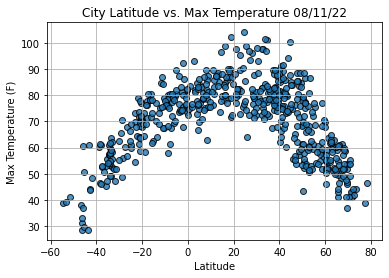

In [26]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

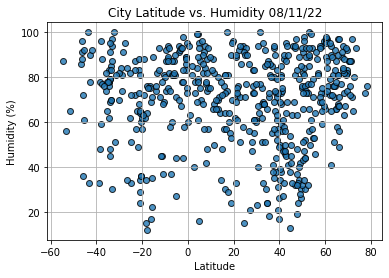

In [27]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

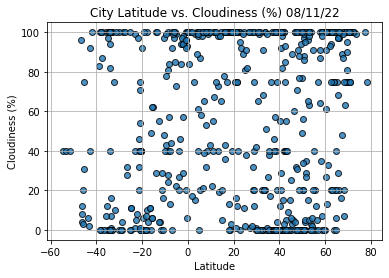

In [28]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

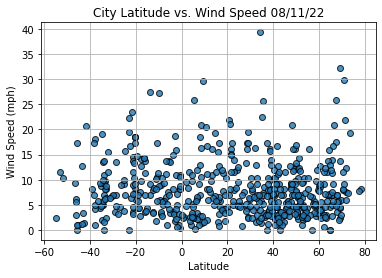

In [29]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()